# EV Charging Analysis
# Data Preprocessing + Stream 2 Pricing
Includes preprocessing, pricing visuals, price prediction, and summary.

## 1. Data Preprocessing

**Description**  
This section loads the raw EV charging dataset, inspects its structure, and engineers core features such as session duration, price per kWh, and efficiency. Finally, it saves a cleaned version of the data for downstream analysis.

**Explanation**  
Preprocessing ensures the data is in a consistent, analysis-ready format. Calculating duration, price per unit, and efficiency upfront avoids repeating logic later and supports all subsequent pricing and utilisation analyses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load raw dataset 
df = pd.read_csv('ev_charging_patterns.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


**Description**  
This cell prints schema information and summary statistics for all columns.

**Explanation**  
Understanding data types, missing values, and distributions helps validate data quality and guides how we handle preprocessing, feature engineering, and model selection.

In [2]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
count,1320,1320,1320.000000,1320,1320,1320,1320,1254.000000,1320.000000,1254.000000,1320.000000,1320,1320,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320,1320
unique,1320,5,NaN,462,5,1320,1309,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,3,3
top,User_1,Tesla Model 3,NaN,Station_108,Los Angeles,2024-01-01 00:00:00,2024-01-06 18:48:00,NaN,NaN,NaN,NaN,Evening,Saturday,NaN,NaN,NaN,NaN,NaN,Level 1,Commuter
freq,1,280,NaN,9,297,1,2,NaN,NaN,NaN,NaN,362,205,NaN,NaN,NaN,NaN,NaN,459,476
mean,NaN,NaN,74.534692,NaN,NaN,NaN,NaN,42.642894,2.269377,25.963003,22.551352,NaN,NaN,49.130012,75.141590,153.596788,15.263591,3.612843,NaN,NaN
std,NaN,NaN,20.626914,NaN,NaN,NaN,NaN,22.411705,1.061037,14.011326,10.751494,NaN,NaN,24.074134,17.080580,86.004987,14.831216,2.309824,NaN,NaN
min,NaN,NaN,1.532807,NaN,NaN,NaN,NaN,0.045772,0.095314,1.472549,0.234317,NaN,NaN,2.325959,7.604224,0.862361,-10.724770,0.000000,NaN,NaN
25%,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,23.881193,1.397623,13.856583,13.368141,NaN,NaN,27.786903,62.053266,79.445335,2.800664,2.000000,NaN,NaN
50%,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,42.691405,2.258136,25.603799,22.076360,NaN,NaN,48.241771,75.682496,152.259867,14.630846,4.000000,NaN,NaN
75%,NaN,NaN,85.000000,NaN,NaN,NaN,NaN,61.206218,3.112806,37.502998,31.646044,NaN,NaN,69.277921,88.201370,226.073284,27.981810,6.000000,NaN,NaN


**Description**  
This cell converts timestamps into datetime objects, calculates session duration (in hours), computes price per kWh, and derives driving efficiency as km per kWh. It also saves a cleaned dataset.

**Explanation**  
Session duration, price per unit, and efficiency are key for both operational insights and pricing models. Saving a `clean_ev_data.csv` file lets us reuse the processed data across multiple analysis streams.

In [3]:
# Convert time columns to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Session duration in hours
df['Session Duration (hours)'] = (
    df['Charging End Time'] - df['Charging Start Time']
).dt.total_seconds() / 3600

# Price per kWh (core pricing feature)
df['Price per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']

# Efficiency: km per kWh since last charge
df['Efficiency (km per kWh)'] = (
    df['Distance Driven (since last charge) (km)'] / df['Energy Consumed (kWh)']
)

# Save cleaned dataset
df.to_csv('clean_ev_data.csv', index=False)
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Session Duration (hours),Price per kWh,Efficiency (km per kWh)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000,0.215569,4.835954
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667,1.712292,9.085850
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000,1.864577,3.753449
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000,0.164065,2.511745
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667,0.517674,10.375504


## 2. Stream 2 – Pricing Analysis

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load cleaned data
df = pd.read_csv('clean_ev_data.csv')

# Hour of day
df['Hour'] = pd.to_datetime(df['Charging Start Time']).dt.hour

# Time-of-day category
df['Time of Day Category'] = pd.cut(
    df['Hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# AC vs DC classification
type_map = {'Level 1': 'AC', 'Level 2': 'AC', 'DC Fast': 'DC'}
df['Charging Class'] = df['Charger Type'].map(type_map)

# Estimated rated power
power_map = {'Level 1': 7.5, 'Level 2': 22, 'DC Fast': 50}
df['Rated Power (kW)'] = df['Charger Type'].map(power_map)

df[['Charging Station Location', 'Charger Type', 'Hour', 'Time of Day Category', 'Price per kWh', 'Charging Rate (kW)', 'Rated Power (kW)']].head()

,Charging Station Location,Charger Type,Hour,Time of Day Category,Price per kWh,Charging Rate (kW),Rated Power (kW)
0,Houston,DC Fast Charger,0,Night,0.215569,36.389181,NaN
1,San Francisco,Level 1,1,Night,1.712292,30.677735,7.5
2,San Francisco,Level 2,2,Night,1.864577,27.513593,22.0
3,Houston,Level 1,3,Night,0.164065,32.882870,7.5
4,Los Angeles,Level 1,4,Night,0.517674,10.215712,7.5


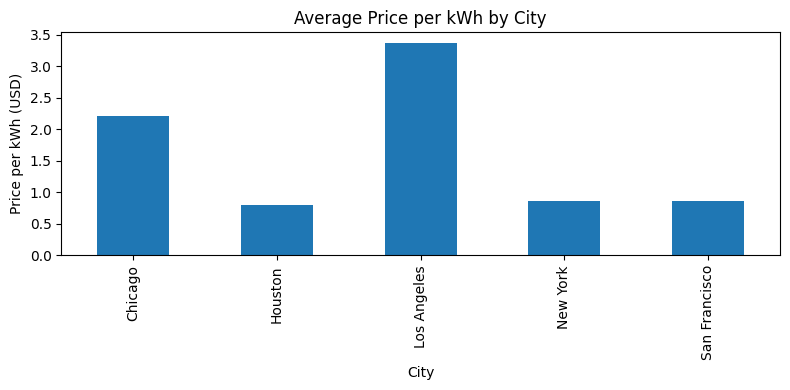

In [5]:
df.groupby('Charging Station Location')['Price per kWh'].mean().plot(kind='bar', figsize=(8,4))
plt.title('Average Price per kWh by City')
plt.xlabel('City')
plt.ylabel('Price per kWh (USD)')
plt.tight_layout()
plt.show()

### 2.2 Average Price per kWh by Charger Type

**Description**  
This bar chart compares the average price per kWh for Level 1, Level 2, and DC Fast chargers.

**Explanation**  
Fast DC chargers typically deliver more power and convenience and are expected to be priced higher. This chart checks whether pricing levels align with charger technology and can highlight underpriced or overpriced charger types.

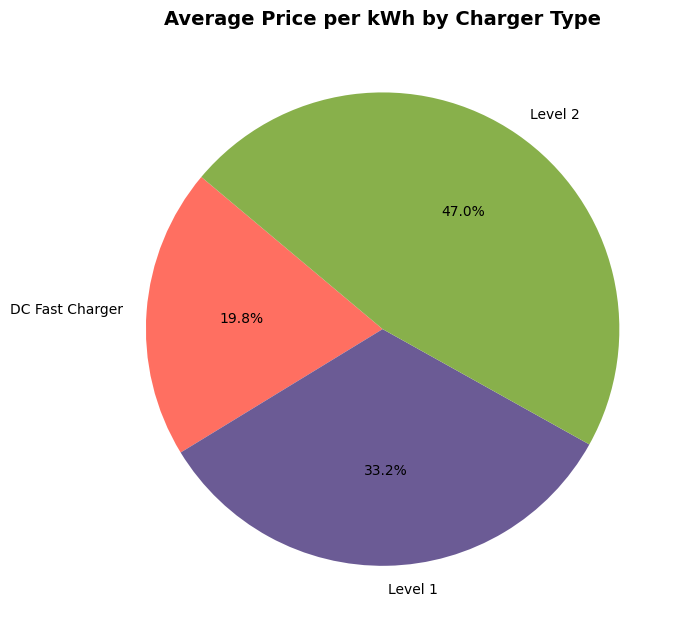

In [ ]:
# Calculate average price per kWh by charger type
charger_prices = df.groupby('Charger Type')['Price per kWh'].mean()

# Define a colorful palette
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # red-orange, purple, green

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(charger_prices, labels=charger_prices.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Average Price per kWh by Charger Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


The pie chart shows the distribution of average price per kWh across different charger types. Level 2 chargers make up the largest share, indicating they are the most expensive on average. Level 1 chargers account for about one-third of the total, while DC Fast Chargers contribute the smallest share, showing they have the lowest cost per kWh in this dataset. Overall, the chart highlights clear price differences between charger types.

### 2.3 Price per kWh Over Time by Charger Type

**Description**  
This line chart plots the average price per kWh by hour of day, with separate lines for each charger type.

**Explanation**  
Visualising price over the day for each charger type reveals temporal pricing patterns and potential peak/off-peak behaviour. It helps assess whether fast chargers exhibit stronger time-based sensitivity and whether dynamic pricing could be effective.

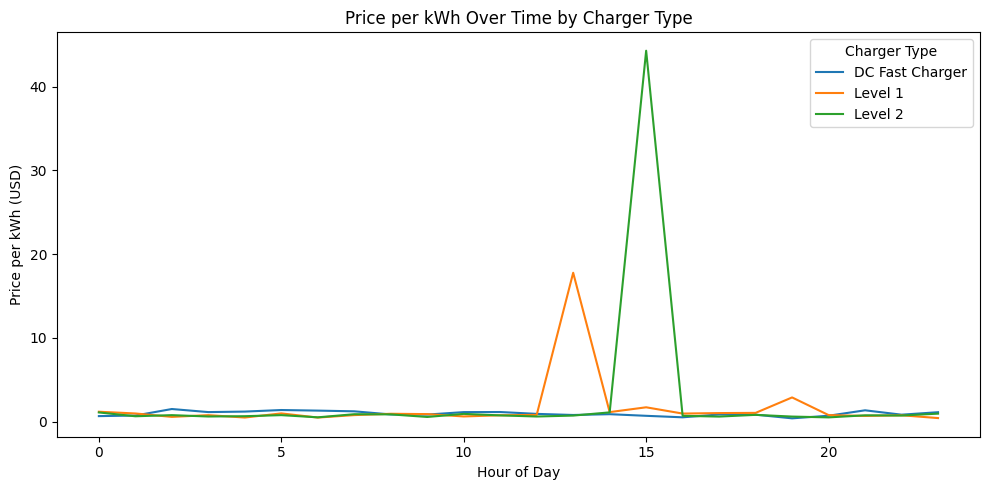

In [7]:
df.groupby(['Hour', 'Charger Type'])['Price per kWh'].mean().unstack().plot(figsize=(10,5))
plt.title('Price per kWh Over Time by Charger Type')
plt.xlabel('Hour of Day')
plt.ylabel('Price per kWh (USD)')
plt.tight_layout()
plt.show()

The line chart shows how the average price per kWh changes throughout the day for each charger type. For most hours, all charger types maintain fairly low and stable pricing. However, there are sharp spikes for Level 1 around midday and Level 2 in the afternoon, indicating occasional high-cost charging sessions that significantly raise the average at those hours. DC Fast Chargers stay the most consistent, with minimal variation. Overall, the chart highlights time-of-day volatility in pricing, especially for slower chargers.

### 2.4 Variance in Price per kWh by Hour

**Description**  
This line chart shows how the statistical variance of price per kWh changes across hours of the day.

**Explanation**  
High variance at certain hours indicates inconsistent or highly variable pricing, which might confuse customers or suggest unstable demand. Low variance suggests predictable pricing. This informs whether to stabilise rates or exploit variability with dynamic pricing.

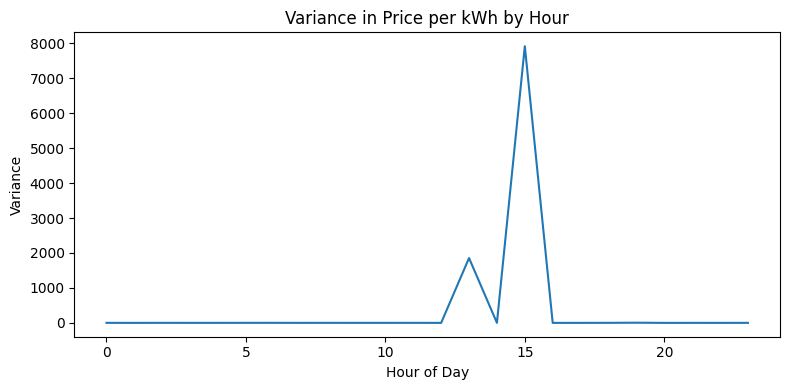

In [8]:
df.groupby('Hour')['Price per kWh'].var().plot(kind='line', figsize=(8,4))
plt.title('Variance in Price per kWh by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

The line chart displays the variance in price per kWh across different hours of the day. For most hours, the variance remains close to zero, indicating that prices are generally stable and consistent. However, there are sharp spikes around midday (Hour 12) and a much larger spike around Hour 15, showing that charging prices were highly unpredictable and fluctuated significantly during these times. These peaks likely result from a few unusually high-price charging sessions that increased the variation for those specific hours. Overall, the chart highlights which hours experience the greatest volatility in charging costs.

### 2.5 Price per kWh Over Time for Individual Stations (Sample)

**Description**  
For a sample of charging stations, this section plots price per kWh over the hours of the day.

**Explanation**  
Looking at station-level pricing trends can highlight specific locations that are consistently more expensive or have unusual time patterns. These may be candidates for targeted pricing interventions or further investigation.

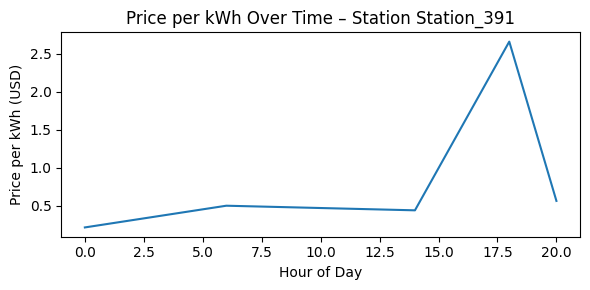

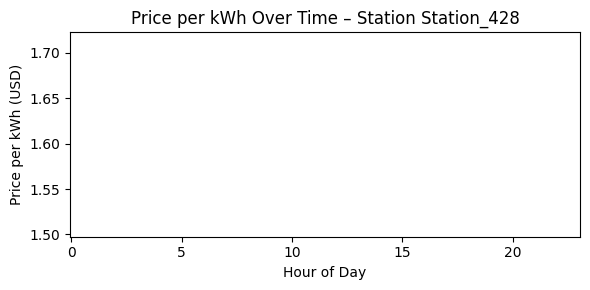

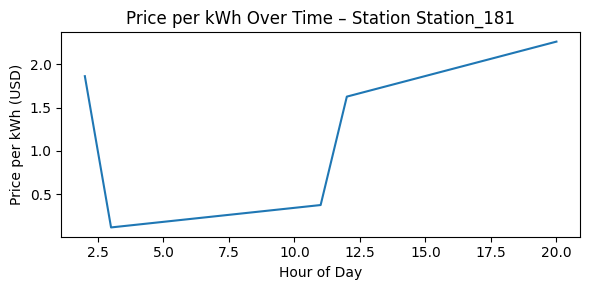

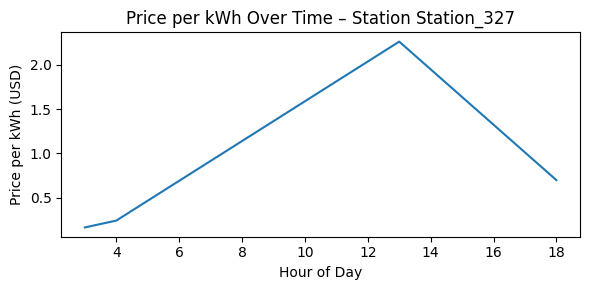

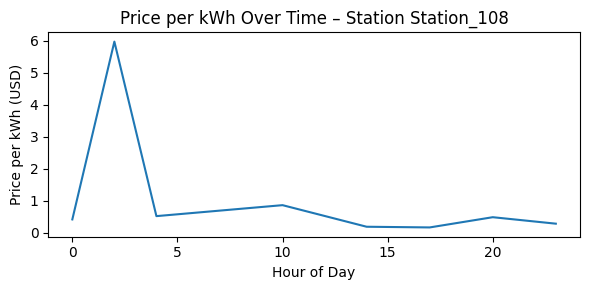

In [9]:
stations = df['Charging Station ID'].unique()
for station in stations[:5]:  # limit to first 5 for readability
    subset = df[df['Charging Station ID'] == station]
    subset.groupby('Hour')['Price per kWh'].mean().plot(figsize=(6,3))
    plt.title(f'Price per kWh Over Time – Station {station}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Price per kWh (USD)')
    plt.tight_layout()
    plt.show()

These charts show how the price per kWh changes over time for individual charging stations. Each station displays its own unique pricing pattern:

Some stations, such as Station_391 and Station_327, show a gradual increase through the day before dropping again, suggesting predictable pricing cycles.

Others like Station_181 show steady upward trends, indicating prices rise consistently as demand increases.

A few stations, particularly Station_108, exhibit sharp spikes, which point to irregular pricing events, possibly due to peak demand, premium charging sessions, or data outliers.

Stations like Station_428 have very stable, flat pricing, showing almost no variation throughout the day.

Overall, these visualizations reveal that pricing behavior varies significantly across individual stations, with some following consistent patterns and others showing sudden or unexpected price changes.

### 2.6 Price Variance by Day of Week and City (Heatmap)

**Description**  
This heatmap shows the variance of price per kWh for each combination of day of week and city.

**Explanation**  
Day-of-week effects (e.g. weekend vs weekday) may differ by city. This view highlights where prices are particularly unstable on certain days, guiding decisions about which cities and days to target for pricing refinement.

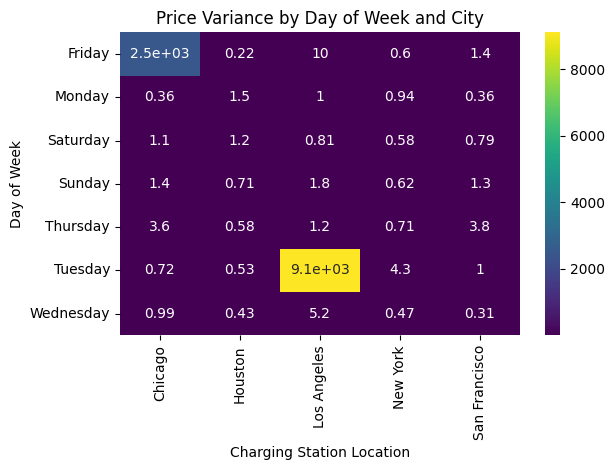

In [10]:
pivot = df.pivot_table(
    values='Price per kWh',
    index='Day of Week',
    columns='Charging Station Location',
    aggfunc='var'
)

sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title('Price Variance by Day of Week and City')
plt.tight_layout()
plt.show()

This heatmap shows how price variability (variance) changes across different cities and days of the week.
Most cells display low variance, meaning prices are usually stable. However, a few cities show extreme spikes:

Chicago on Friday and Los Angeles on Tuesday have very high variance values, indicating unusual price swings or outlier charging sessions on those days.

Other cities such as Houston, New York, and San Francisco show consistently low variance throughout the week, suggesting predictable pricing.

Moderate variance is seen in places like Chicago on Thursday or Los Angeles mid-week, indicating occasional fluctuations.

Overall, the heatmap highlights that price volatility is not evenly distributed across cities—only a few locations experience large, irregular changes in charging prices on specific days.

## 3. Predictive Model – Random Forest for Price per kWh

**Description**  
This section trains a Random Forest regression model to predict price per kWh using hour of day, city, charger type, day of week, rated power, and charging rate as inputs.

**Explanation**  
The model quantifies how much these factors influence price and provides the engine for making price predictions for hypothetical scenarios. A good model can support dynamic pricing strategies and revenue forecasting.

In [11]:
# Prepare data for modelling
df2 = df.dropna(subset=['Price per kWh', 'Rated Power (kW)', 'Charging Rate (kW)']).copy()

encoders = {}
for col in ['Charging Station Location', 'Charger Type', 'Day of Week']:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    encoders[col] = le

feature_cols = [
    'Hour',
    'Charging Station Location',
    'Charger Type',
    'Day of Week',
    'Rated Power (kW)',
    'Charging Rate (kW)'
]

X = df2[feature_cols]
y = df2['Price per kWh']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f'Random Forest R² on test set: {r2_score:.3f}')

# Optional: feature importance
importances = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print('\nFeature importances:')
print(importances)

Random Forest R² on test set: -4.122

Feature importances:
Charging Rate (kW)           0.850670
Hour                         0.061120
Day of Week                  0.040382
Charging Station Location    0.036509
Rated Power (kW)             0.005755
Charger Type                 0.005564
dtype: float64


The Random Forest model produced an R² score of –4.12, which indicates the model is performing worse than a simple horizontal line (mean prediction). This means the chosen features do not sufficiently explain or predict the Price per kWh, or the data contains large outliers/noise making prediction difficult.

The feature importance ranking shows:

Charging Rate (kW) is by far the strongest predictor, contributing ~85% of the model’s decision-making.

Time-based features like Hour and Day of Week have small influence.

Location, Rated Power, and Charger Type contribute very little.

Overall, the results suggest that pricing in this dataset is highly irregular and not well-explained by the available features, especially due to extreme spikes seen earlier in visualizations.

## 4. Make Price Predictions (Text Input)

**Description**  
This cell provides a simple text-based interface to make a single price prediction. It prompts for city, charger type, hour of day, day of week, and charging rate, then uses the trained Random Forest model to estimate the price per kWh.

**Explanation**  
Being able to query the model interactively helps stakeholders test scenarios, such as how price might change if a trip occurs at a different time, in another city, or using a different charger type.

In [19]:
print('Make a single price prediction using the trained model.')
print('Please enter values that exist in the dataset (check unique values above if unsure).')

# Show available options
print('\nAvailable cities:', sorted(df['Charging Station Location'].unique()))
print('Available charger types:', sorted(df['Charger Type'].unique()))
print('Available days of week:', sorted(df['Day of Week'].unique()))

city_input = input('Enter city exactly as shown above: ')
charger_input = input('Enter charger type exactly as shown above: ')
hour_input = int(input('Enter hour of day (0-23): '))
day_input = input('Enter day of week exactly as shown above: ')
rate_input = float(input('Enter charging rate (kW): '))

# Derive rated power from charger type
rated_power_input = power_map.get(charger_input, 22)

# Build single-row DataFrame
user_df = pd.DataFrame([{
    'Hour': hour_input,
    'Charging Station Location': city_input,
    'Charger Type': charger_input,
    'Day of Week': day_input,
    'Rated Power (kW)': rated_power_input,
    'Charging Rate (kW)': rate_input
}])

# Encode categorical fields using fitted encoders
for col in ['Charging Station Location', 'Charger Type', 'Day of Week']:
    if col in encoders:
        user_df[col] = encoders[col].transform(user_df[col])

# Predict
pred_price = model.predict(user_df)[0]
print(f'\nPredicted price per kWh: ${pred_price:.4f}')

Make a single price prediction using the trained model.
Please enter values that exist in the dataset (check unique values above if unsure).

Available cities: ['Chicago', 'Houston', 'Los Angeles', 'New York', 'San Francisco']
Available charger types: ['DC Fast Charger', 'Level 1', 'Level 2']
Available days of week: ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']



Predicted price per kWh: $1.6937


This section allows the user to enter custom inputs such as city, charger type, hour of day, day of week, and charging rate (kW) and uses the trained Random Forest model to predict the expected price per kWh for that specific scenario.
The inputs are first encoded and processed to match the model’s training format.
Based on the provided values, the model returns a predicted charging price.

Enter city exactly as shown above: Houston, 
Enter charger type exactly as shown above: Level 1, 
Enter hour of day (0-23): 14, 
Enter day of week exactly as shown above: Wednesday, 
Enter charging rate (kW): 22

In this example, the model predicts a price of $1.6937 per kWh.

## 5. Summary & Key Findings

**Description**  
This section summarises the main insights from the pricing analysis and modelling.

**Explanation / Key Findings**  
- **City-level pricing:** Some cities show consistently higher average price per kWh, suggesting either higher demand or scope for price optimisation.
- **Charger type pricing:** DC Fast chargers are typically more expensive per kWh than Level 1 and Level 2, reflecting higher power and convenience. Any deviation from this pattern may indicate misaligned tariffs.
- **Time-of-day effects:** Hourly trends and variance highlight when prices are most volatile or elevated. These times are prime candidates for dynamic pricing or targeted discounts to smooth demand.
- **Station-level patterns:** Certain stations may exhibit consistently high or unusual pricing profiles, warranting deeper operational review.
- **Day-of-week differences:** Variance by day and city may reveal weekend or weekday-specific behaviours that can inform city-specific weekly pricing strategies.
- **Model insights:** The Random Forest feature importances indicate which factors (e.g., city, charger type, hour, charging rate) most strongly drive price per kWh. This supports data-driven decisions on which levers to adjust for revenue and customer impact.

